**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [292]:
base = pd.read_csv('titanic/train.csv', sep=',')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [4]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [293]:
base = base.drop(columns=["Name", "Ticket", "PassengerId"])
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [89]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [90]:
base.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando quantidade de instâncias**


In [188]:
Classificação = base["Survived"]
np.unique(Classificação, return_counts=True)

(array([0, 1]), array([549, 342]))

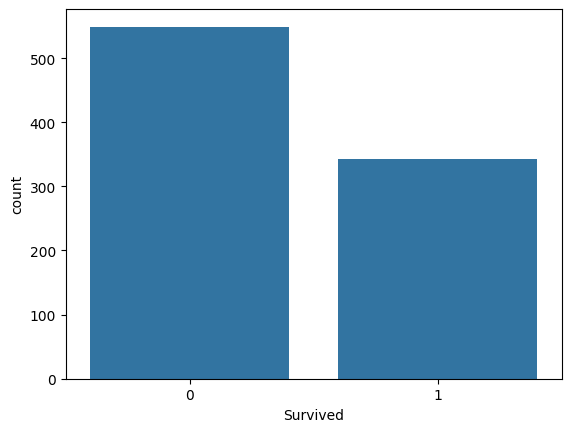

In [189]:
sns.countplot(x = Classificação);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [98]:
from sklearn.preprocessing import LabelEncoder

In [294]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

base["Cabin"] = base["Cabin"].notna().astype(int)


In [295]:
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,22.0,1,0,7.2500,0,2
1,1,0,0,38.0,1,0,71.2833,1,0
2,1,2,0,26.0,0,0,7.9250,0,2
3,1,0,0,35.0,1,0,53.1000,1,2
4,0,2,1,35.0,0,0,8.0500,0,2
...,...,...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,0,13.0000,0,2
887,1,0,0,19.0,0,0,30.0000,1,2
888,0,2,0,NaN,1,2,23.4500,0,2
889,1,0,1,26.0,0,0,30.0000,1,0




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [192]:
len(np.unique(base['SibSp']))

7

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [296]:
cols_onehot_encode = []
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

import numpy as np

# Se quiser faixas de 10 em 10 anos
min_age = int(base_encoded['Age'].min())
max_age = int(base_encoded['Age'].max()) + 10  # garantir que o máximo esteja incluído

bins = list(range(0, max_age + 1, 10))
labels = list(range(1, len(bins)))

# Preencher NaNs antes de cortar
base_encoded['Age'] = base_encoded['Age'].fillna(base_encoded['Age'].median())

# Criar faixas
base_encoded['Age'] = pd.cut(base_encoded['Age'], bins=bins, labels=labels, right=True).astype(int)

base_encoded['Fare'] = base_encoded['Fare'].fillna(base_encoded['Fare'].median())

# Determinar mínimo e máximo da Fare
min_fare = int(base_encoded['Fare'].min())
max_fare = int(base_encoded['Fare'].max()) + 10 # garante que o máximo caia no último bin

# Criar bins de 100 em 100
bins = list(range(0, max_fare + 1, 10))
labels = list(range(1, len(bins)))

# Criar faixas
base_encoded['Fare'] = pd.cut(base_encoded['Fare'], bins=bins, labels=labels, right=True)

# Converter para inteiro permitindo NaNs (caso existam)
base_encoded['Fare'] = base_encoded['Fare'].astype('Int64')

In [297]:
base_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,3,1,0,1,0,2
1,1,0,0,4,1,0,8,1,0
2,1,2,0,3,0,0,1,0,2
3,1,0,0,4,1,0,6,1,2
4,0,2,1,4,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
886,0,1,1,3,0,0,2,0,2
887,1,0,0,2,0,0,3,1,2
888,0,2,0,3,1,2,3,0,2
889,1,0,1,3,0,0,3,1,0


In [298]:
base_encoded.shape

(891, 9)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [299]:
# Supondo que a última coluna seja o target
X_prev = base_encoded.drop(columns=["Survived"])
y_classe = base_encoded["Survived"]


**Método de amostragem Holdout**

In [227]:
from sklearn.model_selection import train_test_split

In [300]:
X_prev

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,3,1,0,1,0,2
1,0,0,4,1,0,8,1,0
2,2,0,3,0,0,1,0,2
3,0,0,4,1,0,6,1,2
4,2,1,4,0,0,1,0,2
...,...,...,...,...,...,...,...,...
886,1,1,3,0,0,2,0,2
887,0,0,2,0,0,3,1,2
888,2,0,3,1,2,3,0,2
889,0,1,3,0,0,3,1,0


In [301]:
y_classe

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [302]:
y_classe.shape

(891,)

In [303]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [304]:
X_treino.shape

(712, 8)

In [305]:
X_teste.shape

(179, 8)

In [306]:
X_teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
709,2,1,3,1,1,2,0,0
439,1,1,4,0,0,2,0,2
840,2,1,2,0,0,1,0,2
720,1,0,1,0,1,4,0,2
39,2,0,2,1,0,2,0,0
...,...,...,...,...,...,...,...,...
433,2,1,2,0,0,1,0,2
773,2,1,3,0,0,1,0,0
25,2,0,4,1,5,4,0,2
84,1,0,2,0,0,2,0,2


In [307]:
y_treino

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [308]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [290]:
import pickle

In [310]:
with open('Titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)